In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from nptdms import TdmsFile
from collections import defaultdict
from scipy.signal import savgol_filter
from IPython.display import Image

improps = dict(aspect='auto', interpolation='none')
ep0, e, h = 8.854e-12, 1.602e-19, 6.626e-34
h_e2 = h/e**2

sample_to_KH = {2: '1', 3: '2', 5: '3', 9: '4', 12: '5', 14: '6', 17: '7', 28: '8',
               7: '9',     # top gate
               4: '10',    # LAO
               6: '11',    # LAO
               8: '12'     # LAO
               }
# 'AO9' --> Vtg

def save_data(file):
    # save a tdms file into a map of {channel_name: channel_data}
    data = {}
    for group in file.groups():
        for channel in group.channels():
            data[channel.name] = channel[:]
    return data

def compute_n(Vt=0, Vb=0):
    # given Vt and Vb, compute density in unit of 10^12 cm^-2
    dt, db = 44.992e-9, 48.556e-9
    epr = 4
    n = ep0*epr/e*(Vt/dt+Vb/db) * 1e-16
    return n

def Vt_to_n(Vt):
    # given Vt, compute density in unit of 10^12 cm^-2
    dt, db = 44.992e-9, 48.556e-9
    Vb = 0
    epr = 4
    n = ep0*epr/e*(Vt/dt+Vb/db) * 1e-16
    return n

def n_to_Vt(n):
    # given n in unit of 10^12 cm^-2, compute Vt
    dt, db = 44.992e-9, 48.556e-9
    Vb = 0
    epr = 4
    Vt = dt*(n*10**16*e/ep0/epr - Vb/db)
    return Vt

# <font color='blue'>0. Device Layout</font>

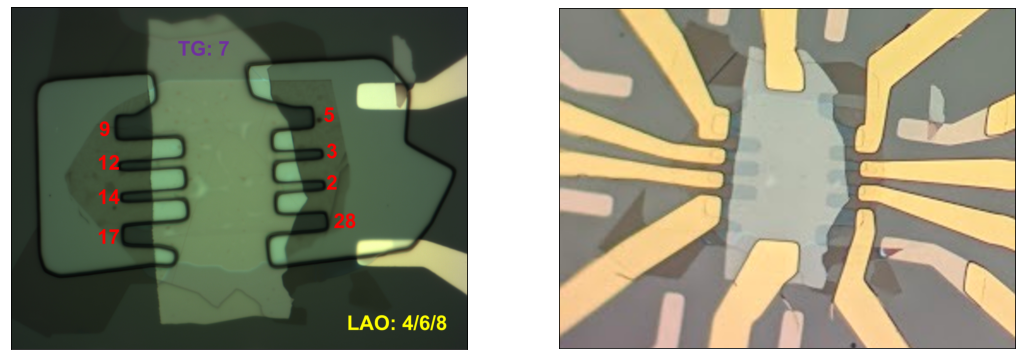

In [2]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(18, 10)
ax[0].imshow(mpimg.imread('layout.png'))
ax[1].imshow(mpimg.imread('layout2.png'))
for axis in ax:
    axis.set_xticks([])
    axis.set_yticks([])
plt.show()

# <font color='blue'>1. "01 - Initial test/" (B = 0, 10mV+100kOhm, 13Hz)</font>

<font size="4"><font color='red'>$\mathbf{Fig. 1a}$</font> SA40379A.20221115.000006.tdms (S/D = 17/9, $V_1/V_2$ = 14/12, $V_{tg}$ from +5V to -5V)

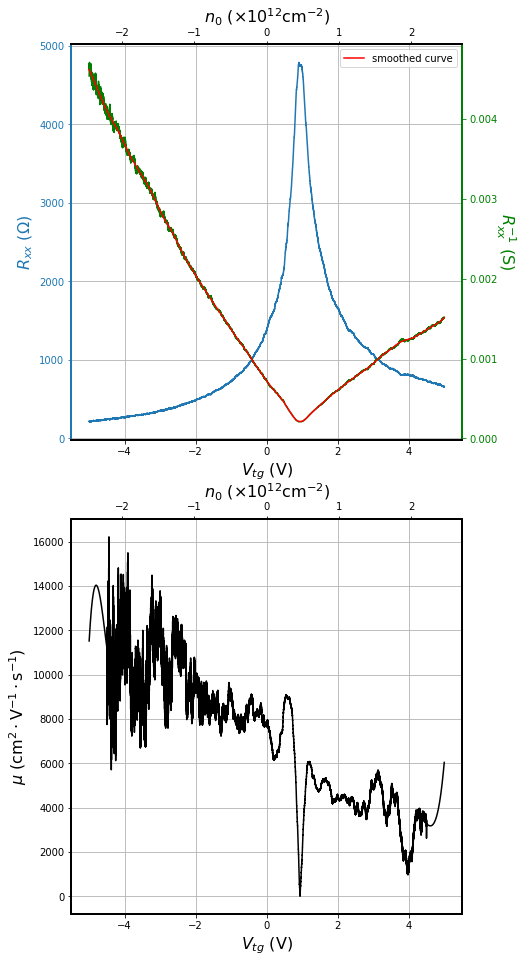

In [3]:
data = save_data(TdmsFile.read(r"SA40379A.20221115/01 - Initial test/SA40379A.20221115.000006.tdms"))

fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_size_inches(7, 16)

ax1.plot(data['AO9'][::-1], (data['X6'][::-1]-data['X5'][::-1])/data['X4'][::-1])
ax1.set_xlabel('$V_{tg}$ (V)', size=16)
ax1.set_ylabel('$R_{xx}$ ($\Omega$)', size=16, color='C0')
secax = ax1.secondary_xaxis('top', functions=(Vt_to_n, n_to_Vt))
secax.set_xlabel('$n_0$ ($\\times \\mathrm{10^{12} cm^{-2}}$)', size=16)
ax1.grid('on')

sigma = 1/((data['X6'][::-1]-data['X5'][::-1])/data['X4'][::-1])
s = savgol_filter(sigma, len(sigma)//10+1, 4)

ax11 = ax1.twinx()
ax11.plot(data['AO9'][::-1], sigma, color='g')
ax11.plot(data['AO9'][::-1], s, color='r', label='smoothed curve')
ax11.set_ylabel('$R_{xx}^{-1}$ (S)', size=16, color='g', rotation=-90, labelpad=20)
ax1.tick_params(axis='y', colors='C0')
ax11.tick_params(axis='y', colors='g')
ax11.spines['left'].set_color('C0')
ax11.spines['right'].set_color('g')
ax11.legend()

Vtg = data['AO9'][::-1]
mu = np.abs(np.diff(s) / np.diff(compute_n(Vtg)*10**16)) / e
ax2.plot(Vtg[:-1], mu*10**4, color='k')
ax2.set_xlabel('$V_{tg}$ (V)', size=16)
ax2.set_ylabel('$\mu$ ($\\mathrm{cm^2 \cdot V^{-1} \cdot s^{-1}}$)', size=16)
secax = ax2.secondary_xaxis('top', functions=(Vt_to_n, n_to_Vt))
secax.set_xlabel('$n_0$ ($\\times \\mathrm{10^{12} cm^{-2}}$)', size=16)
ax2.grid('on')

for axis in ['top','bottom','left','right']:
    ax11.spines[axis].set_linewidth(2)
    ax2.spines[axis].set_linewidth(2)
    
plt.show()

<font size="4"><font color='red'>$\mathbf{Fig. 1b}$</font> SA40379A.20221115.000007.tdms (S/D = 17/9, $V_1/V_2$ = 14/12, $V_{tg}$ from -5V to +5V)

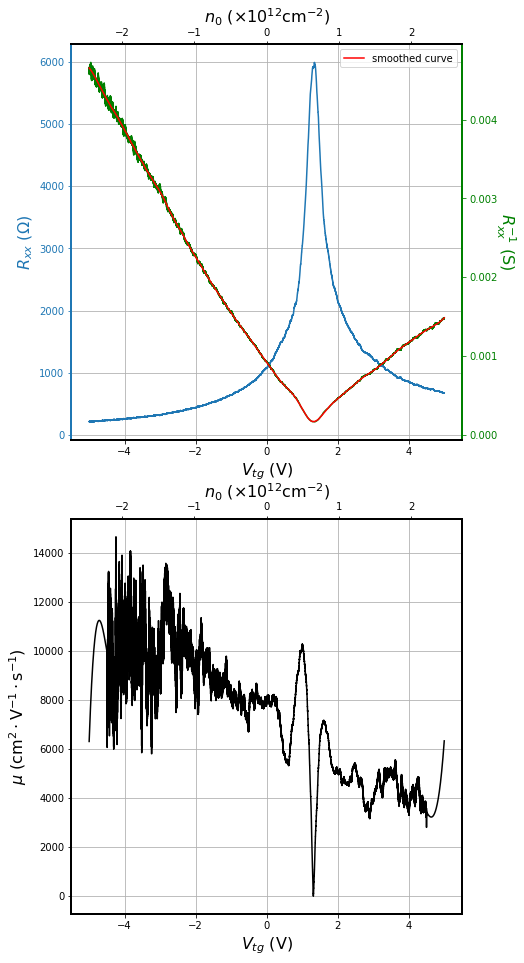

In [4]:
data = save_data(TdmsFile.read(r"SA40379A.20221115/01 - Initial test/SA40379A.20221115.000007.tdms"))

fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_size_inches(7, 16)

ax1.plot(data['AO9'], (data['X6']-data['X5'])/data['X4'])
ax1.set_xlabel('$V_{tg}$ (V)', size=16)
ax1.set_ylabel('$R_{xx}$ ($\Omega$)', size=16, color='C0')
secax = ax1.secondary_xaxis('top', functions=(Vt_to_n, n_to_Vt))
secax.set_xlabel('$n_0$ ($\\times \\mathrm{10^{12} cm^{-2}}$)', size=16)
ax1.grid('on')

sigma = 1/((data['X6']-data['X5'])/data['X4'])
s = savgol_filter(sigma, len(sigma)//10+1, 4)

ax11 = ax1.twinx()
ax11.plot(data['AO9'], sigma, color='g')
ax11.plot(data['AO9'], s, color='r', label='smoothed curve')
ax11.set_ylabel('$R_{xx}^{-1}$ (S)', size=16, color='g', rotation=-90, labelpad=20)
ax1.tick_params(axis='y', colors='C0')
ax11.tick_params(axis='y', colors='g')
ax11.spines['left'].set_color('C0')
ax11.spines['right'].set_color('g')
ax11.legend()

Vtg = data['AO9']
mu = np.abs(np.diff(s) / np.diff(compute_n(Vtg)*10**16)) / e
ax2.plot(Vtg[:-1], mu*10**4, color='k')
ax2.set_xlabel('$V_{tg}$ (V)', size=16)
ax2.set_ylabel('$\mu$ ($\\mathrm{cm^2 \cdot V^{-1} \cdot s^{-1}}$)', size=16)
secax = ax2.secondary_xaxis('top', functions=(Vt_to_n, n_to_Vt))
secax.set_xlabel('$n_0$ ($\\times \\mathrm{10^{12} cm^{-2}}$)', size=16)
ax2.grid('on')

for axis in ['top','bottom','left','right']:
    ax11.spines[axis].set_linewidth(2)
    ax2.spines[axis].set_linewidth(2)
    
plt.show()

<font size="4"><font color='red'>$\mathbf{Fig. 1c}$</font> SA40379A.20221115.000008.tdms (S/D = 17/9, $V_1/V_2$ = 14/12, $V_{tg}$ from +5V to -5V)

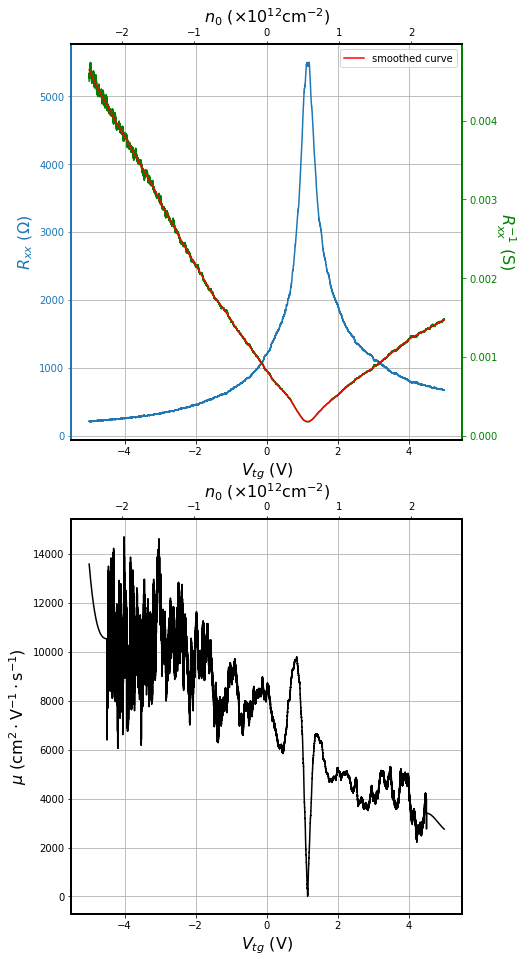

In [5]:
data = save_data(TdmsFile.read(r"SA40379A.20221115/01 - Initial test/SA40379A.20221115.000008.tdms"))

fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_size_inches(7, 16)

ax1.plot(data['AO9'][::-1], (data['X6'][::-1]-data['X5'][::-1])/data['X4'][::-1])
ax1.set_xlabel('$V_{tg}$ (V)', size=16)
ax1.set_ylabel('$R_{xx}$ ($\Omega$)', size=16, color='C0')
secax = ax1.secondary_xaxis('top', functions=(Vt_to_n, n_to_Vt))
secax.set_xlabel('$n_0$ ($\\times \\mathrm{10^{12} cm^{-2}}$)', size=16)
ax1.grid('on')

sigma = 1/((data['X6'][::-1]-data['X5'][::-1])/data['X4'][::-1])
s = savgol_filter(sigma, len(sigma)//10+1, 4)

ax11 = ax1.twinx()
ax11.plot(data['AO9'][::-1], sigma, color='g')
ax11.plot(data['AO9'][::-1], s, color='r', label='smoothed curve')
ax11.set_ylabel('$R_{xx}^{-1}$ (S)', size=16, color='g', rotation=-90, labelpad=20)
ax1.tick_params(axis='y', colors='C0')
ax11.tick_params(axis='y', colors='g')
ax11.spines['left'].set_color('C0')
ax11.spines['right'].set_color('g')
ax11.legend()

Vtg = data['AO9'][::-1]
mu = np.abs(np.diff(s) / np.diff(compute_n(Vtg)*10**16)) / e
ax2.plot(Vtg[:-1], mu*10**4, color='k')
ax2.set_xlabel('$V_{tg}$ (V)', size=16)
ax2.set_ylabel('$\mu$ ($\\mathrm{cm^2 \cdot V^{-1} \cdot s^{-1}}$)', size=16)
secax = ax2.secondary_xaxis('top', functions=(Vt_to_n, n_to_Vt))
secax.set_xlabel('$n_0$ ($\\times \\mathrm{10^{12} cm^{-2}}$)', size=16)
ax2.grid('on')

for axis in ['top','bottom','left','right']:
    ax11.spines[axis].set_linewidth(2)
    ax2.spines[axis].set_linewidth(2)
    
plt.show()

<font size="4"><font color='red'>$\mathbf{Fig. 1d}$</font> SA40379A.20221115.000009.tdms (S/D = 28/5, $V_1/V_2$ = 2/3, $V_{tg}$ from -5V to +5V)

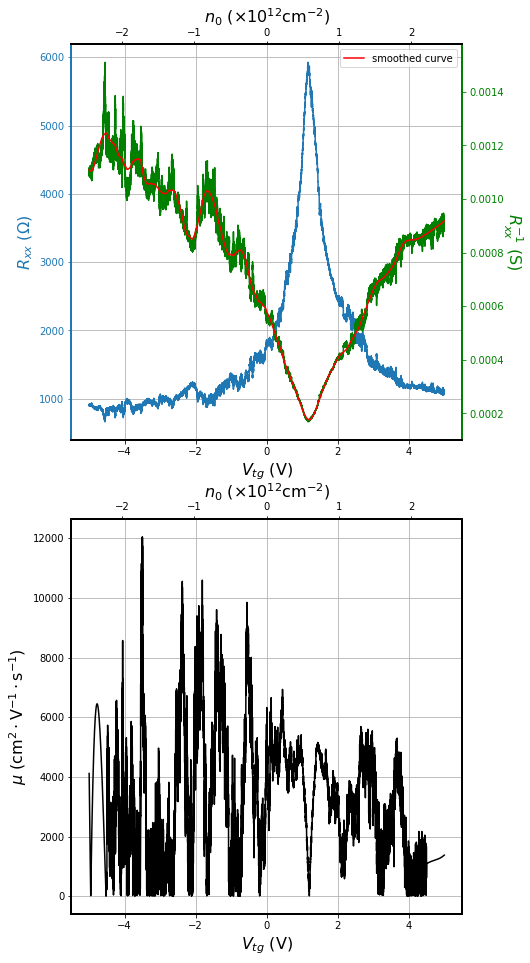

In [6]:
data = save_data(TdmsFile.read(r"SA40379A.20221115/01 - Initial test/SA40379A.20221115.000009.tdms"))

fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_size_inches(7, 16)

ax1.plot(data['AO9'], (data['X'+sample_to_KH[2]]-data['X'+sample_to_KH[3]])/data['X'+sample_to_KH[5]])
ax1.set_xlabel('$V_{tg}$ (V)', size=16)
ax1.set_ylabel('$R_{xx}$ ($\Omega$)', size=16, color='C0')
secax = ax1.secondary_xaxis('top', functions=(Vt_to_n, n_to_Vt))
secax.set_xlabel('$n_0$ ($\\times \\mathrm{10^{12} cm^{-2}}$)', size=16)
ax1.grid('on')

sigma = 1/((data['X'+sample_to_KH[2]]-data['X'+sample_to_KH[3]])/data['X'+sample_to_KH[5]])
s = savgol_filter(sigma, len(sigma)//10+1, 4)

ax11 = ax1.twinx()
ax11.plot(data['AO9'], sigma, color='g')
ax11.plot(data['AO9'], s, color='r', label='smoothed curve')
ax11.set_ylabel('$R_{xx}^{-1}$ (S)', size=16, color='g', rotation=-90, labelpad=20)
ax1.tick_params(axis='y', colors='C0')
ax11.tick_params(axis='y', colors='g')
ax11.spines['left'].set_color('C0')
ax11.spines['right'].set_color('g')
ax11.legend()

Vtg = data['AO9']
mu = np.abs(np.diff(s) / np.diff(compute_n(Vtg)*10**16)) / e
ax2.plot(Vtg[:-1], mu*10**4, color='k')
ax2.set_xlabel('$V_{tg}$ (V)', size=16)
ax2.set_ylabel('$\mu$ ($\\mathrm{cm^2 \cdot V^{-1} \cdot s^{-1}}$)', size=16)
secax = ax2.secondary_xaxis('top', functions=(Vt_to_n, n_to_Vt))
secax.set_xlabel('$n_0$ ($\\times \\mathrm{10^{12} cm^{-2}}$)', size=16)
ax2.grid('on')

for axis in ['top','bottom','left','right']:
    ax11.spines[axis].set_linewidth(2)
    ax2.spines[axis].set_linewidth(2)
    
plt.show()

# <font color='blue'>2. "02 - Ramp B from 0 to 18T/" ($V_{tg}$ = +5V, 10mV+100kOhm, 13Hz)</font>

<font size="4"><font color='red'>$\mathbf{Fig. 2a}$</font> SA40379A.20221115.000009.tdms (S/D = 28/5, B from 0 to 18T)<br>
plot $R_{xx}$ (2-3) and $R_{xy}$ (3-12) together

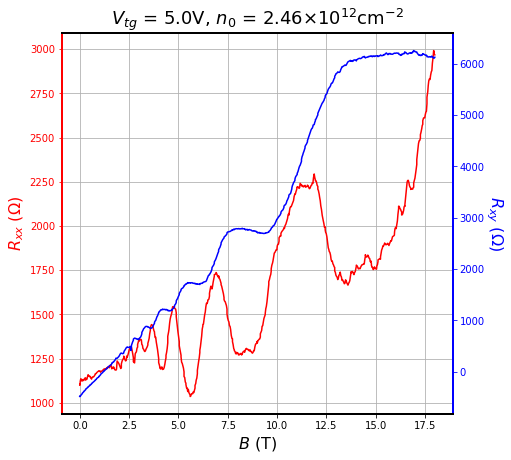

In [8]:
data = save_data(TdmsFile.read(r"SA40379A.20221115/02 - Ramp B from 0 to 18T/SA40379A.20221115.000007.tdms"))

z_xx = (data['X'+sample_to_KH[2]]-data['X'+sample_to_KH[3]])/data['X'+sample_to_KH[5]]
z_xy = (data['X'+sample_to_KH[3]]-data['X'+sample_to_KH[12]])/data['X'+sample_to_KH[5]]

fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(7, 7)

n = round(compute_n(Vt=data['AO9'][0]), 2)
ax1.plot(data['Magnet'], z_xx, label='$V_{tg}$ = '+str(data['AO9'][0])+'V', color='r')
ax1.set_xlabel('$B$ (T)', size=16)
ax1.set_ylabel('$R_{xx}$ ($\Omega$)', size=16, color='r')
ax11 = ax1.twinx()
ax11.plot(data['Magnet'], z_xy, label='$V_{tg}$ = '+str(data['AO9'][0])+'V', color='b')
ax11.set_ylabel('$R_{xy}$ ($\Omega$)', size=16, color='b', rotation=-90, labelpad=20)
ax1.grid('on')
ax1.set_title('$V_{tg}$ = '+str(data['AO9'][0])+'V, $n_0$ = '+str(n)+'$\\times \\mathrm{10^{12} cm^{-2}}$', size=18)

ax1.tick_params(axis='y', colors='r')
ax11.tick_params(axis='y', colors='b')
ax11.spines['left'].set_color('r')
ax11.spines['right'].set_color('b')
for axis in ['top','bottom','left','right']:
    ax11.spines[axis].set_linewidth(2)

plt.show()

# <font color='blue'>3. "03 - Vsg sweep at 18T/" (B = 18T, 10mV+100kOhm, 13Hz)</font>

<font size="4"><font color='red'>$\mathbf{Fig. 3a}$</font> SA40379A.20221115.000000.tdms (S/D = 28/5, $V_{tg}$ from +5V to -5V)<br>
plot $R_{xx}$ (2-3) and $R_{xy}$ (3-12) together

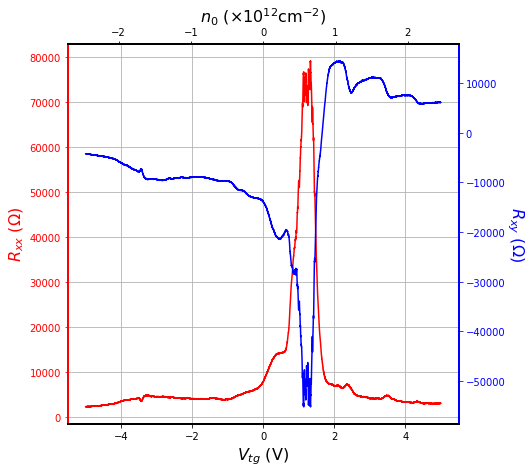

In [10]:
data = save_data(TdmsFile.read(r"SA40379A.20221115/03 - Vsg sweep at 18T/SA40379A.20221115.000000.tdms"))

fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(7, 7)
ax1.plot(data['AO9'][::-1], (data['X'+sample_to_KH[2]][::-1]-data['X'+sample_to_KH[3]][::-1])/data['X'+sample_to_KH[5]][::-1],
         color='r')
ax1.set_xlabel('$V_{tg}$ (V)', size=16)
ax1.set_ylabel('$R_{xx}$ ($\Omega$)', size=16, color='r')
ax11 = ax1.twinx()
ax11.plot(data['AO9'][::-1], (data['X'+sample_to_KH[3]][::-1]-data['X'+sample_to_KH[12]][::-1])/data['X'+sample_to_KH[5]][::-1],
          color='b')
ax11.set_ylabel('$R_{xy}$ ($\Omega$)', size=16, color='b', rotation=-90, labelpad=20)
secax = ax1.secondary_xaxis('top', functions=(Vt_to_n, n_to_Vt))
secax.set_xlabel('$n_0$ ($\\times \\mathrm{10^{12} cm^{-2}}$)', size=16)
ax1.grid('on')
ax1.tick_params(axis='y', colors='r')
ax11.tick_params(axis='y', colors='b')
ax11.spines['left'].set_color('r')
ax11.spines['right'].set_color('b')
for axis in ['top','bottom','left','right']:
    ax11.spines[axis].set_linewidth(2)
plt.show()

<font size="4"><font color='red'>$\mathbf{Fig. 3b}$</font> SA40379A.20221115.000001.tdms (S/D = 17/9, $V_1/V_2$ = 14/12, $V_{tg}$ from -5V to +5V)<br>
plot $R_{xx}$ (14-12) and $R_{xy}$ (2-14) together

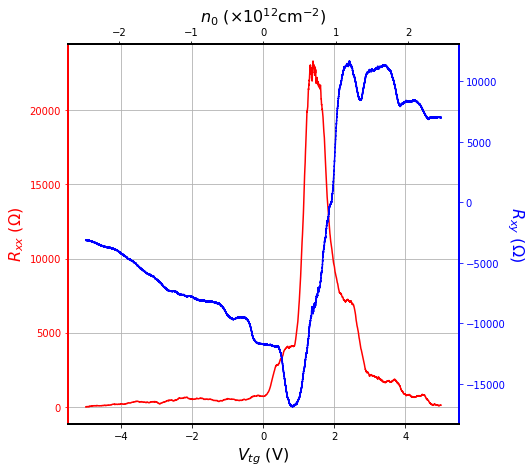

In [11]:
data = save_data(TdmsFile.read(r"SA40379A.20221115/03 - Vsg sweep at 18T/SA40379A.20221115.000001.tdms"))

fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(7, 7)

ax1.plot(data['AO9'], (data['X'+sample_to_KH[14]]-data['X'+sample_to_KH[12]])/data['X'+sample_to_KH[9]], color='r')
ax1.set_xlabel('$V_{tg}$ (V)', size=16)
ax1.set_ylabel('$R_{xx}$ ($\Omega$)', size=16, color='r')
ax11 = ax1.twinx()
ax11.plot(data['AO9'], (data['X'+sample_to_KH[2]]-data['X'+sample_to_KH[14]])/data['X'+sample_to_KH[9]], color='b')
ax11.set_ylabel('$R_{xy}$ ($\Omega$)', size=16, color='b', rotation=-90, labelpad=20)
secax = ax1.secondary_xaxis('top', functions=(Vt_to_n, n_to_Vt))
secax.set_xlabel('$n_0$ ($\\times \\mathrm{10^{12} cm^{-2}}$)', size=16)
ax1.grid('on')
ax1.tick_params(axis='y', colors='r')
ax11.tick_params(axis='y', colors='b')
ax11.spines['left'].set_color('r')
ax11.spines['right'].set_color('b')
for axis in ['top','bottom','left','right']:
    ax11.spines[axis].set_linewidth(2)
plt.show()

# <font color='blue'>4. "04 - B sweep Vtg sweep/" (S/D = 28/5, 10mV+100kOhm, 13Hz)</font>

<font size="4">SA40379A.20221115.000000.tdms to ...000095.tdms (S/D = 28/5, $V_{tg}$ slow from +5V to -5V and fast back to +5V, B from +18T to -1T, step size 0.2T)<br>
Note: len(data) = 16120, from +5 to -5V corresponds to 0-15600 (i.e. data[15600] = data at -5V)</font>

In [13]:
frange = range(0, 96)
data = defaultdict(list)
for i in frange:
    fnum = str(i) if i > 9 else '0'+str(i)
    file = TdmsFile.read(r"SA40379A.20221115/04 - B sweep Vtg sweep/SA40379A.20221115.0000"+fnum+".tdms")
    for group in file.groups():
        for channel in group.channels():
            if len(channel[:]) == 16120:
                data[channel.name].append(channel[:15601])
            else:
                data[channel.name].append(channel[:])
for key in data:
    temp = []
    for i in range(len(data[key])):
        temp.append(data[key][i][::-1])
    data[key] = np.array(temp[::-1])

<font size="4"><font color='red'>$\mathbf{Fig. 4a}$</font> four-terminal resistance between 2 and 3

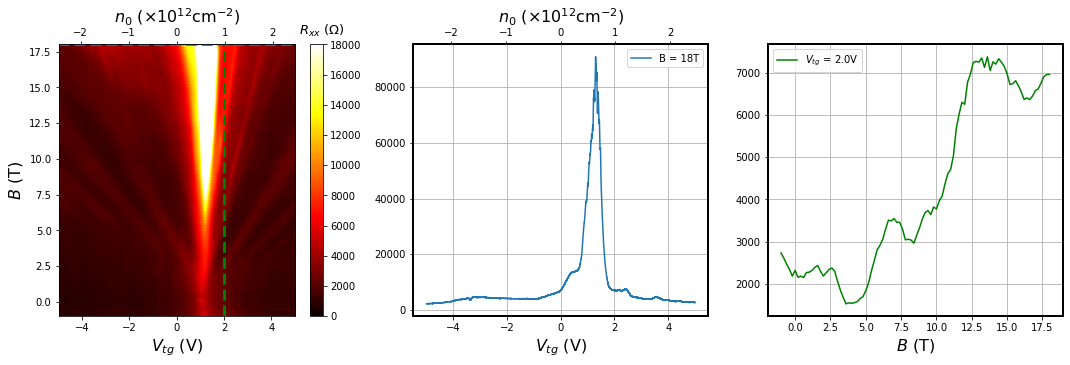

In [14]:
z = (data['X'+sample_to_KH[2]]-data['X'+sample_to_KH[3]])/data['X'+sample_to_KH[5]]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(18, 5)

im = ax1.imshow(z, extent = (-5, 5, -1, 18), origin='lower', cmap='hot', **improps, vmin=0, vmax=18e3)
ax1.plot(data['AO9'][0], [18]*len(data['AO9'][0]), linestyle='--', linewidth=3)
ax1.plot([2]*96, np.linspace(-1, 18, 96), linestyle='--', linewidth=3, color='g')
cbar = plt.colorbar(im, ax=ax1)
cbar.set_label('$R_{xx}$ ($\Omega$)', labelpad=-40, y=1.08, rotation=0, size=13)
ax1.set_xlabel('$V_{tg}$ (V)', size=16)
ax1.set_ylabel('$B$ (T)', size=16)
ax1.set_xlim(-5, 5)
ax1.set_ylim(-1, 18)
secax = ax1.secondary_xaxis('top', functions=(Vt_to_n, n_to_Vt))
secax.set_xlabel('$n_0$ ($\\times \\mathrm{10^{12} cm^{-2}}$)', size=16)

ax2.plot(data['AO9'][0], z[-1], label='B = 18T')
ax2.set_xlabel('$V_{tg}$ (V)', size=16)
secax = ax2.secondary_xaxis('top', functions=(Vt_to_n, n_to_Vt))
secax.set_xlabel('$n_0$ ($\\times \\mathrm{10^{12} cm^{-2}}$)', size=16)
ax2.legend()
ax2.grid('on')
for axis in ['top','bottom','left','right']:
    ax2.spines[axis].set_linewidth(2)

ax3.plot(np.linspace(-1, 18, 96), z[:,10920], label='$V_{tg}$ = '+str(data['AO9'][0][10920])+'V', color='g')
ax3.set_xlabel('$B$ (T)', size=16)
ax3.legend()
ax3.grid('on')
for axis in ['top','bottom','left','right']:
    ax3.spines[axis].set_linewidth(2)

plt.show()

<font size="4"><font color='red'>$\mathbf{Fig. 4b}$</font> four-terminal resistance between 14 and 12

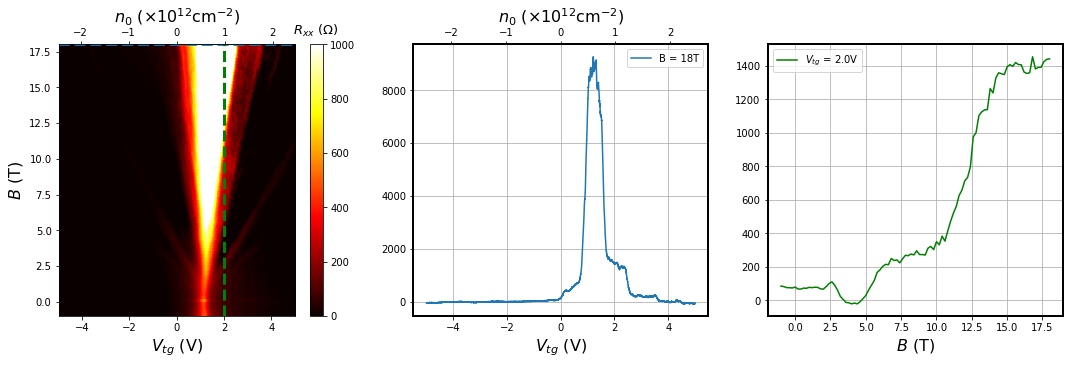

In [15]:
z = (data['X'+sample_to_KH[14]]-data['X'+sample_to_KH[12]])/data['X'+sample_to_KH[5]]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(18, 5)

im = ax1.imshow(z, extent = (-5, 5, -1, 18), origin='lower', cmap='hot', **improps, vmin=0, vmax=1e3)
ax1.plot(data['AO9'][0], [18]*len(data['AO9'][0]), linestyle='--', linewidth=3)
ax1.plot([2]*96, np.linspace(-1, 18, 96), linestyle='--', linewidth=3, color='g')
cbar = plt.colorbar(im, ax=ax1)
cbar.set_label('$R_{xx}$ ($\Omega$)', labelpad=-40, y=1.08, rotation=0, size=13)
ax1.set_xlabel('$V_{tg}$ (V)', size=16)
ax1.set_ylabel('$B$ (T)', size=16)
ax1.set_xlim(-5, 5)
ax1.set_ylim(-1, 18)
secax = ax1.secondary_xaxis('top', functions=(Vt_to_n, n_to_Vt))
secax.set_xlabel('$n_0$ ($\\times \\mathrm{10^{12} cm^{-2}}$)', size=16)

ax2.plot(data['AO9'][0], z[-1], label='B = 18T')
ax2.set_xlabel('$V_{tg}$ (V)', size=16)
secax = ax2.secondary_xaxis('top', functions=(Vt_to_n, n_to_Vt))
secax.set_xlabel('$n_0$ ($\\times \\mathrm{10^{12} cm^{-2}}$)', size=16)
ax2.legend()
ax2.grid('on')
for axis in ['top','bottom','left','right']:
    ax2.spines[axis].set_linewidth(2)

ax3.plot(np.linspace(-1, 18, 96), z[:,10920], label='$V_{tg}$ = '+str(data['AO9'][0][10920])+'V', color='g')
ax3.set_xlabel('$B$ (T)', size=16)
ax3.legend()
ax3.grid('on')
for axis in ['top','bottom','left','right']:
    ax3.spines[axis].set_linewidth(2)

plt.show()

<font size="4"><font color='red'>$\mathbf{Fig. 4c}$</font> four-terminal resistance between 2 and 14

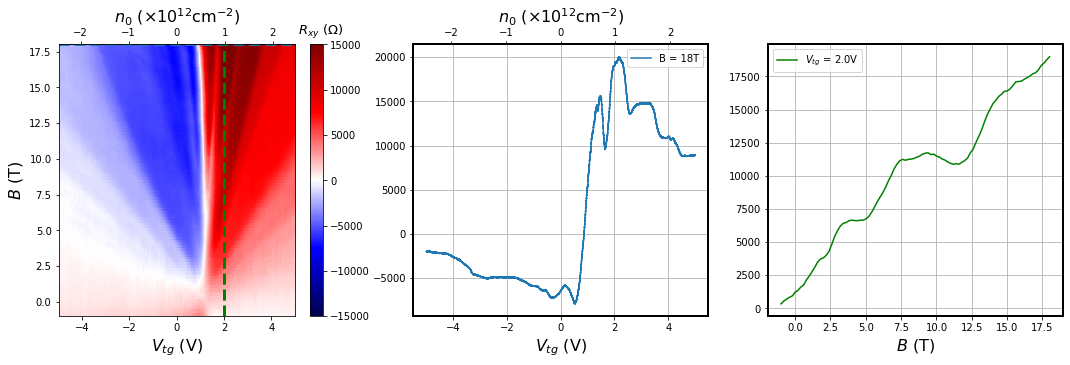

In [16]:
z = (data['X'+sample_to_KH[2]]-data['X'+sample_to_KH[14]])/data['X'+sample_to_KH[5]]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(18, 5)

im = ax1.imshow(z, extent = (-5, 5, -1, 18), origin='lower', cmap='seismic', **improps, vmin=-15e3, vmax=15e3)
ax1.plot(data['AO9'][0], [18]*len(data['AO9'][0]), linestyle='--', linewidth=3)
ax1.plot([2]*96, np.linspace(-1, 18, 96), linestyle='--', linewidth=3, color='g')
cbar = plt.colorbar(im, ax=ax1)
cbar.set_label('$R_{xy}$ ($\Omega$)', labelpad=-50, y=1.08, rotation=0, size=13)
ax1.set_xlabel('$V_{tg}$ (V)', size=16)
ax1.set_ylabel('$B$ (T)', size=16)
ax1.set_xlim(-5, 5)
ax1.set_ylim(-1, 18)
secax = ax1.secondary_xaxis('top', functions=(Vt_to_n, n_to_Vt))
secax.set_xlabel('$n_0$ ($\\times \\mathrm{10^{12} cm^{-2}}$)', size=16)

ax2.plot(data['AO9'][0], z[-1], label='B = 18T')
ax2.set_xlabel('$V_{tg}$ (V)', size=16)
secax = ax2.secondary_xaxis('top', functions=(Vt_to_n, n_to_Vt))
secax.set_xlabel('$n_0$ ($\\times \\mathrm{10^{12} cm^{-2}}$)', size=16)
ax2.legend()
ax2.grid('on')
for axis in ['top','bottom','left','right']:
    ax2.spines[axis].set_linewidth(2)

ax3.plot(np.linspace(-1, 18, 96), z[:,10920], label='$V_{tg}$ = '+str(data['AO9'][0][10920])+'V', color='g')
ax3.set_xlabel('$B$ (T)', size=16)
ax3.legend()
ax3.grid('on')
for axis in ['top','bottom','left','right']:
    ax3.spines[axis].set_linewidth(2)

plt.show()

<font size="4"><font color='red'>$\mathbf{Fig. 4d}$</font> four-terminal resistance between 3 and 12

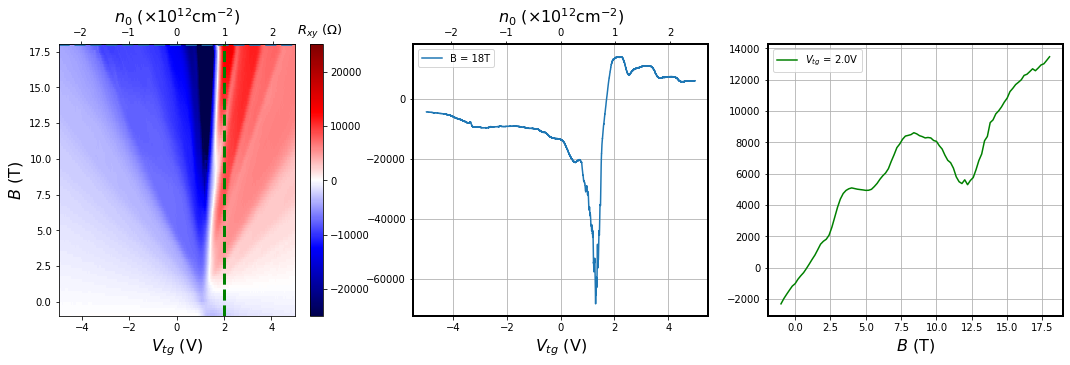

In [17]:
z = (data['X'+sample_to_KH[3]]-data['X'+sample_to_KH[12]])/data['X'+sample_to_KH[5]]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(18, 5)

im = ax1.imshow(z, extent = (-5, 5, -1, 18), origin='lower', cmap='seismic', **improps, vmin=-25e3, vmax=25e3)
ax1.plot(data['AO9'][0], [18]*len(data['AO9'][0]), linestyle='--', linewidth=3)
ax1.plot([2]*96, np.linspace(-1, 18, 96), linestyle='--', linewidth=3, color='g')
cbar = plt.colorbar(im, ax=ax1)
cbar.set_label('$R_{xy}$ ($\Omega$)', labelpad=-50, y=1.08, rotation=0, size=13)
ax1.set_xlabel('$V_{tg}$ (V)', size=16)
ax1.set_ylabel('$B$ (T)', size=16)
ax1.set_xlim(-5, 5)
ax1.set_ylim(-1, 18)
secax = ax1.secondary_xaxis('top', functions=(Vt_to_n, n_to_Vt))
secax.set_xlabel('$n_0$ ($\\times \\mathrm{10^{12} cm^{-2}}$)', size=16)

ax2.plot(data['AO9'][0], z[-1], label='B = 18T')
ax2.set_xlabel('$V_{tg}$ (V)', size=16)
secax = ax2.secondary_xaxis('top', functions=(Vt_to_n, n_to_Vt))
secax.set_xlabel('$n_0$ ($\\times \\mathrm{10^{12} cm^{-2}}$)', size=16)
ax2.legend()
ax2.grid('on')
for axis in ['top','bottom','left','right']:
    ax2.spines[axis].set_linewidth(2)

ax3.plot(np.linspace(-1, 18, 96), z[:,10920], label='$V_{tg}$ = '+str(data['AO9'][0][10920])+'V', color='g')
ax3.set_xlabel('$B$ (T)', size=16)
ax3.legend()
ax3.grid('on')
for axis in ['top','bottom','left','right']:
    ax3.spines[axis].set_linewidth(2)

plt.show()

<font size="4"><font color='red'>$\mathbf{Fig. 4e}$</font> plot linecuts of $R_{xx}$ (2-3) and $R_{xy}$ (3-12) at fixed $V_{tg}$ together

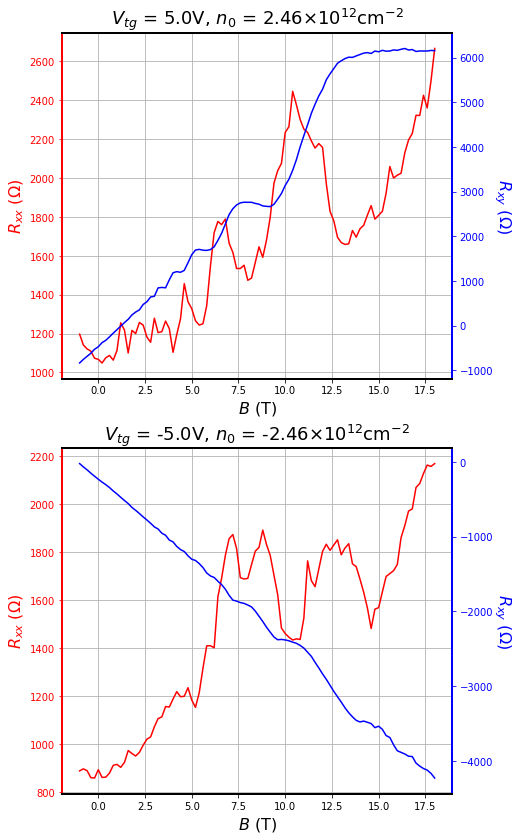

In [18]:
z_xx = (data['X'+sample_to_KH[2]]-data['X'+sample_to_KH[3]])/data['X'+sample_to_KH[5]]
z_xy = (data['X'+sample_to_KH[3]]-data['X'+sample_to_KH[12]])/data['X'+sample_to_KH[5]]

fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_size_inches(7, 14)

col = -1
n = round(compute_n(Vt=data['AO9'][0][col]), 2)
ax1.plot(np.linspace(-1, 18, 96), z_xx[:,col], label='$V_{tg}$ = '+str(data['AO9'][0][col])+'V', color='r')
ax1.set_xlabel('$B$ (T)', size=16)
ax1.set_ylabel('$R_{xx}$ ($\Omega$)', size=16, color='r')
ax11 = ax1.twinx()
ax11.plot(np.linspace(-1, 18, 96), z_xy[:,col], label='$V_{tg}$ = '+str(data['AO9'][0][col])+'V', color='b')
ax11.set_ylabel('$R_{xy}$ ($\Omega$)', size=16, color='b', rotation=-90, labelpad=20)
ax1.grid('on')
ax1.set_title('$V_{tg}$ = '+str(data['AO9'][0][col])+'V, $n_0$ = '+str(n)+'$\\times \\mathrm{10^{12} cm^{-2}}$', size=18)
ax1.tick_params(axis='y', colors='r')
ax11.tick_params(axis='y', colors='b')
ax11.spines['left'].set_color('r')
ax11.spines['right'].set_color('b')
for axis in ['top','bottom','left','right']:
    ax11.spines[axis].set_linewidth(2)

col = 0
n = round(compute_n(Vt=data['AO9'][0][col]), 2)
ax2.plot(np.linspace(-1, 18, 96), z_xx[:,col], label='$V_{tg}$ = '+str(data['AO9'][0][col])+'V', color='r')
ax2.set_xlabel('$B$ (T)', size=16)
ax2.set_ylabel('$R_{xx}$ ($\Omega$)', size=16, color='r')
ax22 = ax2.twinx()
ax22.plot(np.linspace(-1, 18, 96), z_xy[:,col], label='$V_{tg}$ = '+str(data['AO9'][0][col])+'V', color='b')
ax22.set_ylabel('$R_{xy}$ ($\Omega$)', size=16, color='b', rotation=-90, labelpad=20)
ax2.grid('on')
ax2.set_title('$V_{tg}$ = '+str(data['AO9'][0][col])+'V, $n_0$ = '+str(n)+'$\\times \\mathrm{10^{12} cm^{-2}}$', size=18)
ax2.tick_params(axis='y', colors='r')
ax22.tick_params(axis='y', colors='b')
ax22.spines['left'].set_color('r')
ax22.spines['right'].set_color('b')
for axis in ['top','bottom','left','right']:
    ax22.spines[axis].set_linewidth(2)

plt.show()

# <font color='blue'>5. "05 - Ramp B from 0 to -18T/" ($V_{tg}$ = +5V, 10mV+100kOhm, 13Hz)</font>

<font size="4"><font color='red'>$\mathbf{Fig. 5a}$</font> SA40379A.20221115.000000.tdms (S/D = 17/9, B from 0 to -18T)<br>
plot $R_{xx}$ (2-3) and $R_{xy}$ (3-12) together

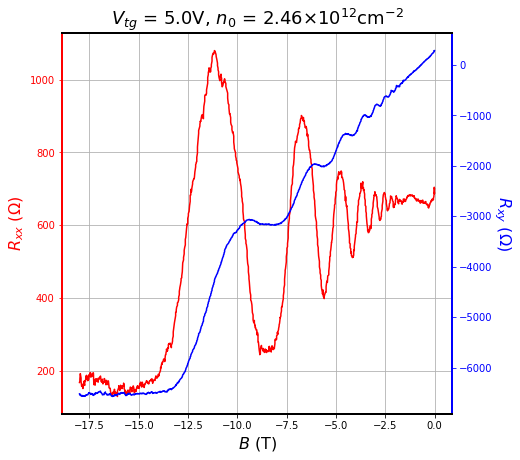

In [20]:
data = save_data(TdmsFile.read(r"SA40379A.20221115/05 - Ramp B from 0 to -18T/SA40379A.20221115.000000.tdms"))

z_xx = (data['X'+sample_to_KH[14]]-data['X'+sample_to_KH[12]])/data['X'+sample_to_KH[9]]
z_xy = (data['X'+sample_to_KH[3]]-data['X'+sample_to_KH[12]])/data['X'+sample_to_KH[9]]

fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(7, 7)

n = round(compute_n(Vt=data['AO9'][0]), 2)
ax1.plot(data['Magnet'], z_xx, label='$V_{tg}$ = '+str(data['AO9'][0])+'V', color='r')
ax1.set_xlabel('$B$ (T)', size=16)
ax1.set_ylabel('$R_{xx}$ ($\Omega$)', size=16, color='r')
ax11 = ax1.twinx()
ax11.plot(data['Magnet'], z_xy, label='$V_{tg}$ = '+str(data['AO9'][0])+'V', color='b')
ax11.set_ylabel('$R_{xy}$ ($\Omega$)', size=16, color='b', rotation=-90, labelpad=20)
# N = np.arange(1,8)*4
# ax11.set_ylabel('$R_{xy}$ ($h/e^2$)', size=16, color='b', rotation=-90, labelpad=20)
# ax11.set_yticks(h_e2*(-1/N))
# ax11.set_yticklabels(['-1/'+str(s) for s in N])
ax1.grid('on')
ax1.set_title('$V_{tg}$ = '+str(round(data['AO9'][0], 2))+'V, $n_0$ = '+str(n)+'$\\times \\mathrm{10^{12} cm^{-2}}$', size=18)
ax1.tick_params(axis='y', colors='r')
ax11.tick_params(axis='y', colors='b')
ax11.spines['left'].set_color('r')
ax11.spines['right'].set_color('b')
for axis in ['top','bottom','left','right']:
    ax11.spines[axis].set_linewidth(2)
plt.show()

# <font color='blue'>6. "06 - B sweep Vtg sweep/" (S/D = 17/9, 10mV+100kOhm, 13Hz)</font>

<font size="4">SA40379A.20221115.000000.tdms to ...000180.tdms (S/D = 17/9, $V_{tg}$ slow from +5V to -5V and fast back to +5V, B from -18T to +18T, step size 0.2T)<br>
Note: len(data) = 10920, from +5 to -5V corresponds to 0-10400 (i.e. data[10400] = data at -5V)</font>

In [22]:
frange = range(0, 181)
data = defaultdict(list)
for i in frange:
    if i > 99: fnum = str(i)
    elif i > 9: fnum = '0'+str(i)
    else: fnum = '00'+str(i)
    file = TdmsFile.read(r"SA40379A.20221115/06 - B sweep Vtg sweep/SA40379A.20221115.000"+fnum+".tdms")
    for group in file.groups():
        for channel in group.channels():
            if len(channel[:]) == 10920:
                data[channel.name].append(channel[:10401])
            else:
                data[channel.name].append(channel[:])
for key in data:
    temp = []
    for i in range(len(data[key])):
        temp.append(data[key][i][::-1])
    data[key] = np.array(temp[:])

<font size="4"><font color='red'>$\mathbf{Fig. 6a}$</font> four-terminal resistance between 14 and 12

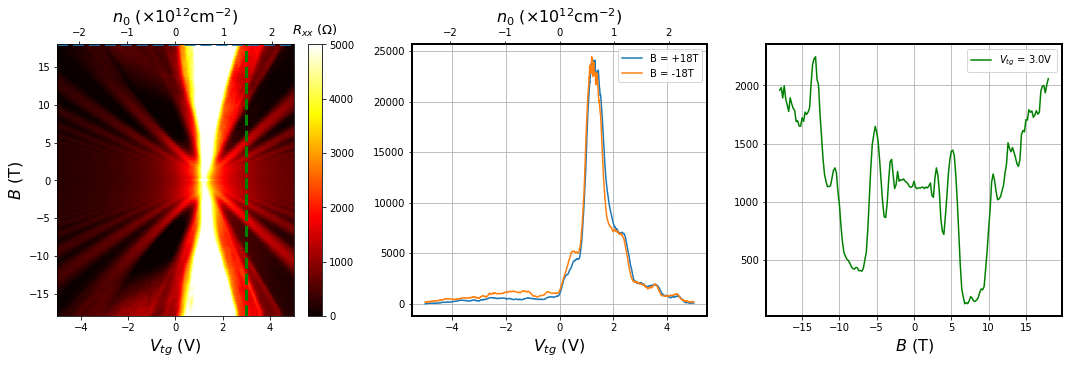

In [23]:
z = (data['X'+sample_to_KH[14]]-data['X'+sample_to_KH[12]])/data['X'+sample_to_KH[9]]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(18, 5)

# ii = 7280 (2.0V)
ii = 8320
Vt0 = round(data['AO9'][0][ii], 2)

im = ax1.imshow(z, extent = (-5, 5, -18, 18), origin='lower', cmap='hot', **improps, vmin=0, vmax=5e3)
ax1.plot(data['AO9'][0], [18]*len(data['AO9'][0]), linestyle='--', linewidth=3)
ax1.plot([Vt0]*96, np.linspace(-18, 18, 96), linestyle='--', linewidth=3, color='g')
cbar = plt.colorbar(im, ax=ax1)
cbar.set_label('$R_{xx}$ ($\Omega$)', labelpad=-40, y=1.08, rotation=0, size=13)
ax1.set_xlabel('$V_{tg}$ (V)', size=16)
ax1.set_ylabel('$B$ (T)', size=16)
ax1.set_xlim(-5, 5)
ax1.set_ylim(-18, 18)
secax = ax1.secondary_xaxis('top', functions=(Vt_to_n, n_to_Vt))
secax.set_xlabel('$n_0$ ($\\times \\mathrm{10^{12} cm^{-2}}$)', size=16)

ax2.plot(data['AO9'][0], z[-1], label='B = +18T')
ax2.plot(data['AO9'][0], z[0], label='B = -18T')
ax2.set_xlabel('$V_{tg}$ (V)', size=16)
secax = ax2.secondary_xaxis('top', functions=(Vt_to_n, n_to_Vt))
secax.set_xlabel('$n_0$ ($\\times \\mathrm{10^{12} cm^{-2}}$)', size=16)
ax2.legend()
ax2.grid('on')
for axis in ['top','bottom','left','right']:
    ax2.spines[axis].set_linewidth(2)

ax3.plot(np.linspace(-18, 18, 181), z[:,ii], label='$V_{tg}$ = '+str(Vt0)+'V', color='g')
ax3.set_xlabel('$B$ (T)', size=16)
ax3.legend()
ax3.grid('on')
for axis in ['top','bottom','left','right']:
    ax3.spines[axis].set_linewidth(2)

plt.show()

<font size="4"><font color='red'>$\mathbf{Fig. 6b}$</font> four-terminal resistance between 2 and 3

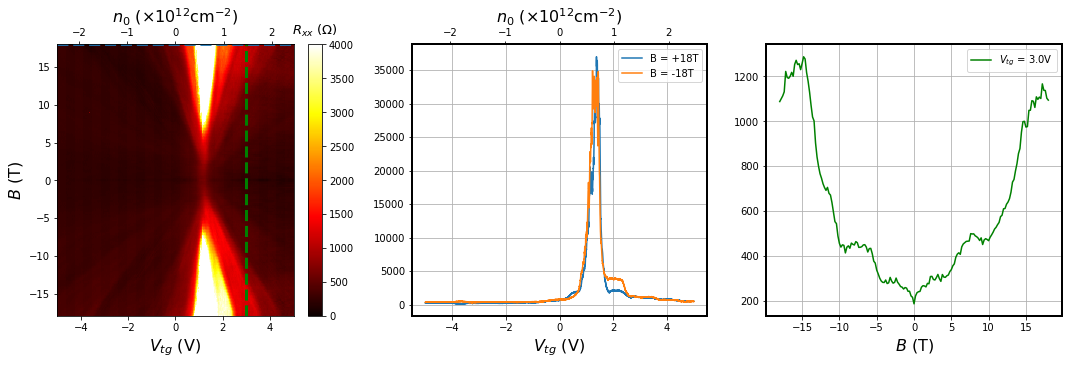

In [24]:
z = (data['X'+sample_to_KH[2]]-data['X'+sample_to_KH[3]])/data['X'+sample_to_KH[9]]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(18, 5)

# ii = 7280 # 2.0V
ii = 8320 # 3.0V
Vt0 = round(data['AO9'][0][ii], 2)

im = ax1.imshow(z, extent = (-5, 5, -18, 18), origin='lower', cmap='hot', **improps, vmin=0, vmax=4e3)
ax1.plot(data['AO9'][0], [18]*len(data['AO9'][0]), linestyle='--', linewidth=3)
ax1.plot([Vt0]*96, np.linspace(-18, 18, 96), linestyle='--', linewidth=3, color='g')
cbar = plt.colorbar(im, ax=ax1)
cbar.set_label('$R_{xx}$ ($\Omega$)', labelpad=-40, y=1.08, rotation=0, size=13)
ax1.set_xlabel('$V_{tg}$ (V)', size=16)
ax1.set_ylabel('$B$ (T)', size=16)
ax1.set_xlim(-5, 5)
ax1.set_ylim(-18, 18)
secax = ax1.secondary_xaxis('top', functions=(Vt_to_n, n_to_Vt))
secax.set_xlabel('$n_0$ ($\\times \\mathrm{10^{12} cm^{-2}}$)', size=16)

ax2.plot(data['AO9'][0], z[-1], label='B = +18T')
ax2.plot(data['AO9'][0], z[0], label='B = -18T')
ax2.set_xlabel('$V_{tg}$ (V)', size=16)
secax = ax2.secondary_xaxis('top', functions=(Vt_to_n, n_to_Vt))
secax.set_xlabel('$n_0$ ($\\times \\mathrm{10^{12} cm^{-2}}$)', size=16)
ax2.legend()
ax2.grid('on')
for axis in ['top','bottom','left','right']:
    ax2.spines[axis].set_linewidth(2)

ax3.plot(np.linspace(-18, 18, 181), z[:,ii], label='$V_{tg}$ = '+str(Vt0)+'V', color='g')
ax3.set_xlabel('$B$ (T)', size=16)
ax3.legend()
ax3.grid('on')
for axis in ['top','bottom','left','right']:
    ax3.spines[axis].set_linewidth(2)

plt.show()

<font size="4"><font color='red'>$\mathbf{Fig. 6c}$</font> four-terminal resistance between 2 and 14

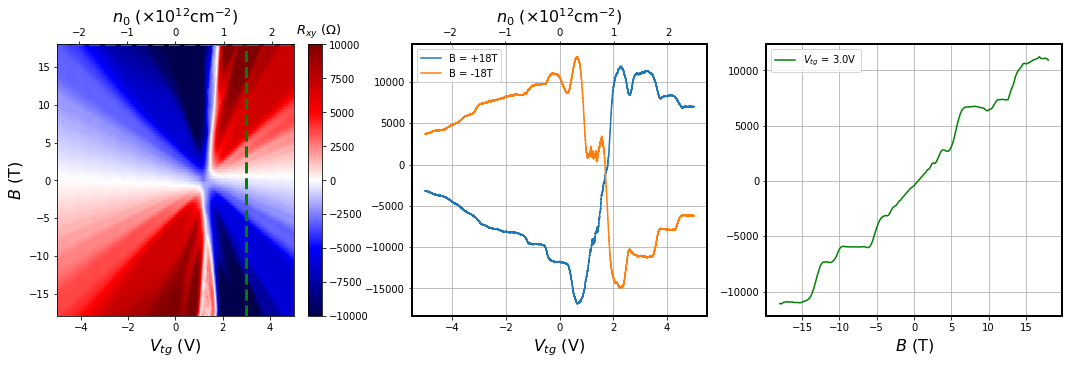

In [25]:
z = (data['X'+sample_to_KH[2]]-data['X'+sample_to_KH[14]])/data['X'+sample_to_KH[9]]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(18, 5)

# ii = 7280 # 2.0V
ii = 8320 # 3.0V
Vt0 = round(data['AO9'][0][ii], 2)

im = ax1.imshow(z, extent = (-5, 5, -18, 18), origin='lower', cmap='seismic', **improps, vmin=-10e3, vmax=10e3)
ax1.plot(data['AO9'][0], [18]*len(data['AO9'][0]), linestyle='--', linewidth=3)
ax1.plot([Vt0]*96, np.linspace(-18, 18, 96), linestyle='--', linewidth=3, color='g')
cbar = plt.colorbar(im, ax=ax1)
cbar.set_label('$R_{xy}$ ($\Omega$)', labelpad=-50, y=1.08, rotation=0, size=13)
ax1.set_xlabel('$V_{tg}$ (V)', size=16)
ax1.set_ylabel('$B$ (T)', size=16)
ax1.set_xlim(-5, 5)
ax1.set_ylim(-18, 18)
secax = ax1.secondary_xaxis('top', functions=(Vt_to_n, n_to_Vt))
secax.set_xlabel('$n_0$ ($\\times \\mathrm{10^{12} cm^{-2}}$)', size=16)

ax2.plot(data['AO9'][0], z[-1], label='B = +18T')
ax2.plot(data['AO9'][0], z[0], label='B = -18T')
ax2.set_xlabel('$V_{tg}$ (V)', size=16)
secax = ax2.secondary_xaxis('top', functions=(Vt_to_n, n_to_Vt))
secax.set_xlabel('$n_0$ ($\\times \\mathrm{10^{12} cm^{-2}}$)', size=16)
ax2.legend()
ax2.grid('on')
for axis in ['top','bottom','left','right']:
    ax2.spines[axis].set_linewidth(2)

ax3.plot(np.linspace(-18, 18, 181), z[:,ii], label='$V_{tg}$ = '+str(Vt0)+'V', color='g')
ax3.set_xlabel('$B$ (T)', size=16)
ax3.legend()
ax3.grid('on')
for axis in ['top','bottom','left','right']:
    ax3.spines[axis].set_linewidth(2)

plt.show()

<font size="4"><font color='red'>$\mathbf{Fig. 6d}$</font> four-terminal resistance between 3 and 12

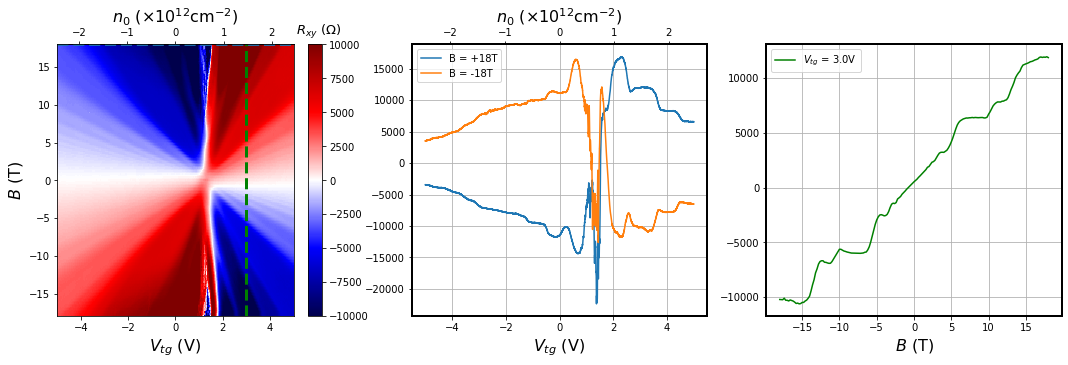

In [26]:
z = (data['X'+sample_to_KH[3]]-data['X'+sample_to_KH[12]])/data['X'+sample_to_KH[9]]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(18, 5)

# ii = 7280 # 2.0V
ii = 8320 # 3.0V
Vt0 = round(data['AO9'][0][ii], 2)

im = ax1.imshow(z, extent = (-5, 5, -18, 18), origin='lower', cmap='seismic', **improps, vmin=-10e3, vmax=10e3)
ax1.plot(data['AO9'][0], [18]*len(data['AO9'][0]), linestyle='--', linewidth=3)
ax1.plot([Vt0]*96, np.linspace(-18, 18, 96), linestyle='--', linewidth=3, color='g')
cbar = plt.colorbar(im, ax=ax1)
cbar.set_label('$R_{xy}$ ($\Omega$)', labelpad=-50, y=1.08, rotation=0, size=13)
ax1.set_xlabel('$V_{tg}$ (V)', size=16)
ax1.set_ylabel('$B$ (T)', size=16)
ax1.set_xlim(-5, 5)
ax1.set_ylim(-18, 18)
secax = ax1.secondary_xaxis('top', functions=(Vt_to_n, n_to_Vt))
secax.set_xlabel('$n_0$ ($\\times \\mathrm{10^{12} cm^{-2}}$)', size=16)

ax2.plot(data['AO9'][0], z[-1], label='B = +18T')
ax2.plot(data['AO9'][0], z[0], label='B = -18T')
ax2.set_xlabel('$V_{tg}$ (V)', size=16)
secax = ax2.secondary_xaxis('top', functions=(Vt_to_n, n_to_Vt))
secax.set_xlabel('$n_0$ ($\\times \\mathrm{10^{12} cm^{-2}}$)', size=16)
ax2.legend()
ax2.grid('on')
for axis in ['top','bottom','left','right']:
    ax2.spines[axis].set_linewidth(2)

ax3.plot(np.linspace(-18, 18, 181), z[:,ii], label='$V_{tg}$ = '+str(Vt0)+'V', color='g')
ax3.set_xlabel('$B$ (T)', size=16)
ax3.legend()
ax3.grid('on')
for axis in ['top','bottom','left','right']:
    ax3.spines[axis].set_linewidth(2)

plt.show()

<font size="4"><font color='red'>$\mathbf{Fig. 6e}$</font> plot linecuts of $R_{xx}$ (14-12) and $R_{xy}$ (3-12) at fixed $V_{tg}$ together

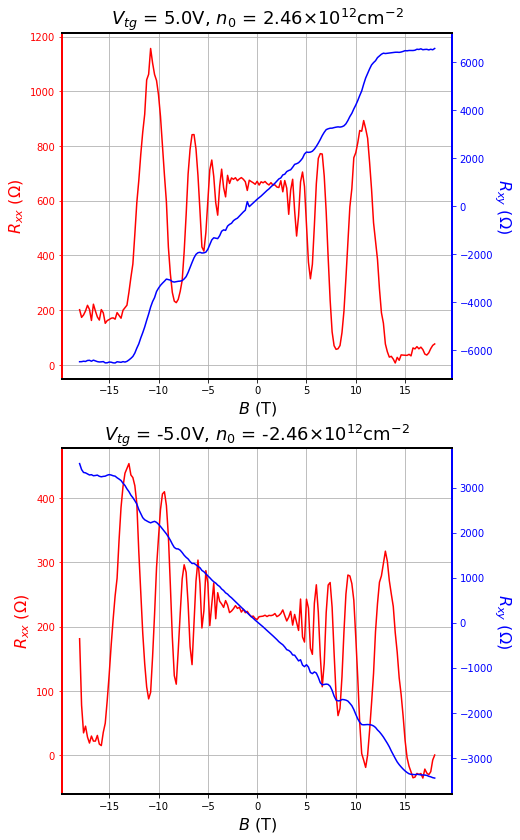

In [27]:
z_xx = (data['X'+sample_to_KH[14]]-data['X'+sample_to_KH[12]])/data['X'+sample_to_KH[9]]
z_xy = (data['X'+sample_to_KH[3]]-data['X'+sample_to_KH[12]])/data['X'+sample_to_KH[9]]

fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_size_inches(7, 14)

col = -1
n = round(compute_n(Vt=data['AO9'][0][col]), 2)
ax1.plot(np.linspace(-18, 18, 181), z_xx[:,col], label='$V_{tg}$ = '+str(data['AO9'][0][col])+'V', color='r')
ax1.set_xlabel('$B$ (T)', size=16)
ax1.set_ylabel('$R_{xx}$ ($\Omega$)', size=16, color='r')
ax11 = ax1.twinx()
ax11.plot(np.linspace(-18, 18, 181), z_xy[:,col], label='$V_{tg}$ = '+str(data['AO9'][0][col])+'V', color='b')
ax11.set_ylabel('$R_{xy}$ ($\Omega$)', size=16, color='b', rotation=-90, labelpad=20)
ax1.grid('on')
ax1.set_title('$V_{tg}$ = '+str(data['AO9'][0][col])+'V, $n_0$ = '+str(n)+'$\\times \\mathrm{10^{12} cm^{-2}}$', size=18)
ax1.tick_params(axis='y', colors='r')
ax11.tick_params(axis='y', colors='b')
ax11.spines['left'].set_color('r')
ax11.spines['right'].set_color('b')
for axis in ['top','bottom','left','right']:
    ax11.spines[axis].set_linewidth(2)

col = 0
n = round(compute_n(Vt=data['AO9'][0][col]), 2)
ax2.plot(np.linspace(-18, 18, 181), z_xx[:,col], label='$V_{tg}$ = '+str(data['AO9'][0][col])+'V', color='r')
ax2.set_xlabel('$B$ (T)', size=16)
ax2.set_ylabel('$R_{xx}$ ($\Omega$)', size=16, color='r')
ax22 = ax2.twinx()
ax22.plot(np.linspace(-18, 18, 181), z_xy[:,col], label='$V_{tg}$ = '+str(data['AO9'][0][col])+'V', color='b')
ax22.set_ylabel('$R_{xy}$ ($\Omega$)', size=16, color='b', rotation=-90, labelpad=20)
ax2.grid('on')
ax2.set_title('$V_{tg}$ = '+str(data['AO9'][0][col])+'V, $n_0$ = '+str(n)+'$\\times \\mathrm{10^{12} cm^{-2}}$', size=18)
ax2.tick_params(axis='y', colors='r')
ax22.tick_params(axis='y', colors='b')
ax22.spines['left'].set_color('r')
ax22.spines['right'].set_color('b')
for axis in ['top','bottom','left','right']:
    ax22.spines[axis].set_linewidth(2)

plt.show()

## <font color='blue'>(Anti-)symmetrization: $\rho_{xx}(B) = \frac{R_{xx}(B)+R_{xx}(-B)}{2}$, $\rho_{xy}(B) = \frac{R_{xy}(B)-R_{xy}(-B)}{2}$</font>

<font size="4"><font color='red'>$\mathbf{Fig. 6f}$</font> post-symmetrization: four-terminal resistance between 14 and 12

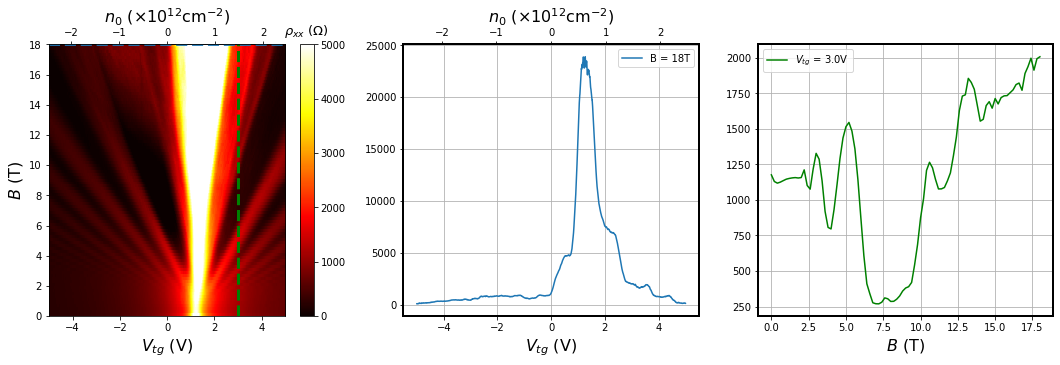

In [28]:
z = (data['X'+sample_to_KH[14]]-data['X'+sample_to_KH[12]])/data['X'+sample_to_KH[9]]
z_s = []
for i in range(len(z)//2+1):
    z_s.append((z[i]+z[-i-1])/2)
z = np.array(z_s[::-1])

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(18, 5)

# ii = 7280 (2.0V)
ii = 8320
Vt0 = round(data['AO9'][0][ii], 2)

im = ax1.imshow(z, extent = (-5, 5, 0, 18), origin='lower', cmap='hot', **improps, vmin=0, vmax=5e3)
ax1.plot(data['AO9'][0], [18]*len(data['AO9'][0]), linestyle='--', linewidth=3)
ax1.plot([Vt0]*96, np.linspace(0, 18, 96), linestyle='--', linewidth=3, color='g')
cbar = plt.colorbar(im, ax=ax1)
cbar.set_label('$\\rho_{xx}$ ($\Omega$)', labelpad=-40, y=1.08, rotation=0, size=13)
ax1.set_xlabel('$V_{tg}$ (V)', size=16)
ax1.set_ylabel('$B$ (T)', size=16)
ax1.set_xlim(-5, 5)
ax1.set_ylim(0, 18)
secax = ax1.secondary_xaxis('top', functions=(Vt_to_n, n_to_Vt))
secax.set_xlabel('$n_0$ ($\\times \\mathrm{10^{12} cm^{-2}}$)', size=16)

ax2.plot(data['AO9'][0], z[-1], label='B = 18T')
ax2.set_xlabel('$V_{tg}$ (V)', size=16)
secax = ax2.secondary_xaxis('top', functions=(Vt_to_n, n_to_Vt))
secax.set_xlabel('$n_0$ ($\\times \\mathrm{10^{12} cm^{-2}}$)', size=16)
ax2.legend()
ax2.grid('on')
for axis in ['top','bottom','left','right']:
    ax2.spines[axis].set_linewidth(2)

ax3.plot(np.linspace(0, 18, 91), z[:,ii], label='$V_{tg}$ = '+str(Vt0)+'V', color='g')
ax3.set_xlabel('$B$ (T)', size=16)
ax3.legend()
ax3.grid('on')
for axis in ['top','bottom','left','right']:
    ax3.spines[axis].set_linewidth(2)

plt.show()

<font size="4"><font color='red'>$\mathbf{Fig. 6g}$</font> post-symmetrization: four-terminal resistance between 2 and 3

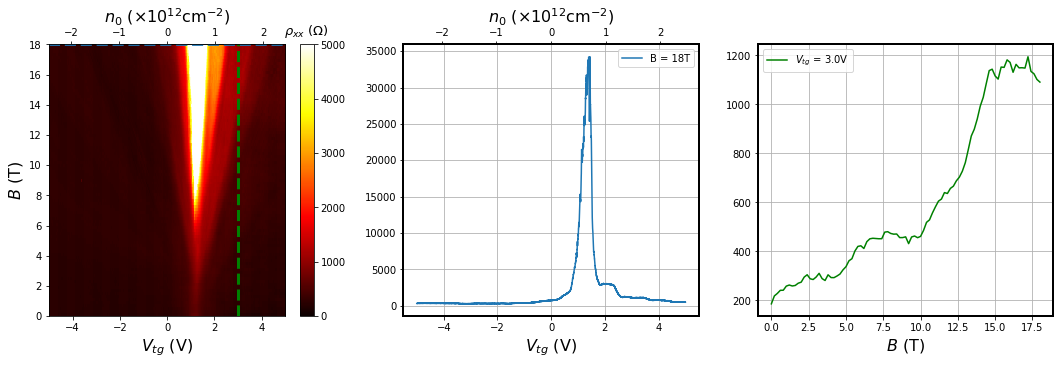

In [29]:
z = (data['X'+sample_to_KH[2]]-data['X'+sample_to_KH[3]])/data['X'+sample_to_KH[9]]
z_s = []
for i in range(len(z)//2+1):
    z_s.append((z[i]+z[-i-1])/2)
z = np.array(z_s[::-1])

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(18, 5)

# ii = 7280 (2.0V)
ii = 8320
Vt0 = round(data['AO9'][0][ii], 2)

im = ax1.imshow(z, extent = (-5, 5, 0, 18), origin='lower', cmap='hot', **improps, vmin=0, vmax=5e3)
ax1.plot(data['AO9'][0], [18]*len(data['AO9'][0]), linestyle='--', linewidth=3)
ax1.plot([Vt0]*96, np.linspace(0, 18, 96), linestyle='--', linewidth=3, color='g')
cbar = plt.colorbar(im, ax=ax1)
cbar.set_label('$\\rho_{xx}$ ($\Omega$)', labelpad=-40, y=1.08, rotation=0, size=13)
ax1.set_xlabel('$V_{tg}$ (V)', size=16)
ax1.set_ylabel('$B$ (T)', size=16)
ax1.set_xlim(-5, 5)
ax1.set_ylim(0, 18)
secax = ax1.secondary_xaxis('top', functions=(Vt_to_n, n_to_Vt))
secax.set_xlabel('$n_0$ ($\\times \\mathrm{10^{12} cm^{-2}}$)', size=16)

ax2.plot(data['AO9'][0], z[-1], label='B = 18T')
ax2.set_xlabel('$V_{tg}$ (V)', size=16)
secax = ax2.secondary_xaxis('top', functions=(Vt_to_n, n_to_Vt))
secax.set_xlabel('$n_0$ ($\\times \\mathrm{10^{12} cm^{-2}}$)', size=16)
ax2.legend()
ax2.grid('on')
for axis in ['top','bottom','left','right']:
    ax2.spines[axis].set_linewidth(2)

ax3.plot(np.linspace(0, 18, 91), z[:,ii], label='$V_{tg}$ = '+str(Vt0)+'V', color='g')
ax3.set_xlabel('$B$ (T)', size=16)
ax3.legend()
ax3.grid('on')
for axis in ['top','bottom','left','right']:
    ax3.spines[axis].set_linewidth(2)

plt.show()

<font size="4"><font color='red'>$\mathbf{Fig. 6h}$</font> post-symmetrization: four-terminal resistance between 2 and 14

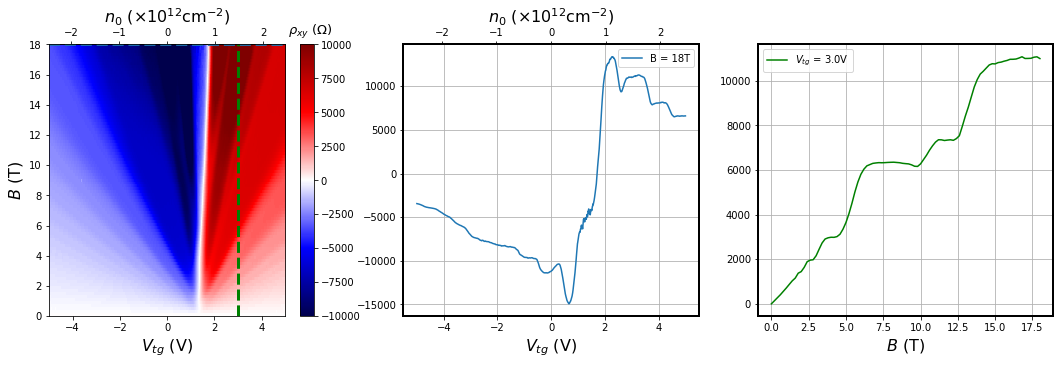

In [30]:
z = (data['X'+sample_to_KH[2]]-data['X'+sample_to_KH[14]])/data['X'+sample_to_KH[9]]
z_s = []
for i in range(len(z)//2+1):
    z_s.append((-z[i]+z[-i-1])/2)
z = np.array(z_s[::-1])

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(18, 5)

# ii = 7280 # 2.0V
ii = 8320 # 3.0V
Vt0 = round(data['AO9'][0][ii], 2)

im = ax1.imshow(z, extent = (-5, 5, 0, 18), origin='lower', cmap='seismic', **improps, vmin=-10e3, vmax=10e3)
ax1.plot(data['AO9'][0], [18]*len(data['AO9'][0]), linestyle='--', linewidth=3)
ax1.plot([Vt0]*96, np.linspace(0, 18, 96), linestyle='--', linewidth=3, color='g')
cbar = plt.colorbar(im, ax=ax1)
cbar.set_label('$\\rho_{xy}$ ($\Omega$)', labelpad=-50, y=1.08, rotation=0, size=13)
ax1.set_xlabel('$V_{tg}$ (V)', size=16)
ax1.set_ylabel('$B$ (T)', size=16)
ax1.set_xlim(-5, 5)
ax1.set_ylim(0, 18)
secax = ax1.secondary_xaxis('top', functions=(Vt_to_n, n_to_Vt))
secax.set_xlabel('$n_0$ ($\\times \\mathrm{10^{12} cm^{-2}}$)', size=16)

ax2.plot(data['AO9'][0], z[-1], label='B = 18T')
ax2.set_xlabel('$V_{tg}$ (V)', size=16)
secax = ax2.secondary_xaxis('top', functions=(Vt_to_n, n_to_Vt))
secax.set_xlabel('$n_0$ ($\\times \\mathrm{10^{12} cm^{-2}}$)', size=16)
ax2.legend()
ax2.grid('on')
for axis in ['top','bottom','left','right']:
    ax2.spines[axis].set_linewidth(2)

ax3.plot(np.linspace(0, 18, 91), z[:,ii], label='$V_{tg}$ = '+str(Vt0)+'V', color='g')
ax3.set_xlabel('$B$ (T)', size=16)
ax3.legend()
ax3.grid('on')
for axis in ['top','bottom','left','right']:
    ax3.spines[axis].set_linewidth(2)

plt.show()

<font size="4"><font color='red'>$\mathbf{Fig. 6i}$</font> post-symmetrization: four-terminal resistance between 3 and 12

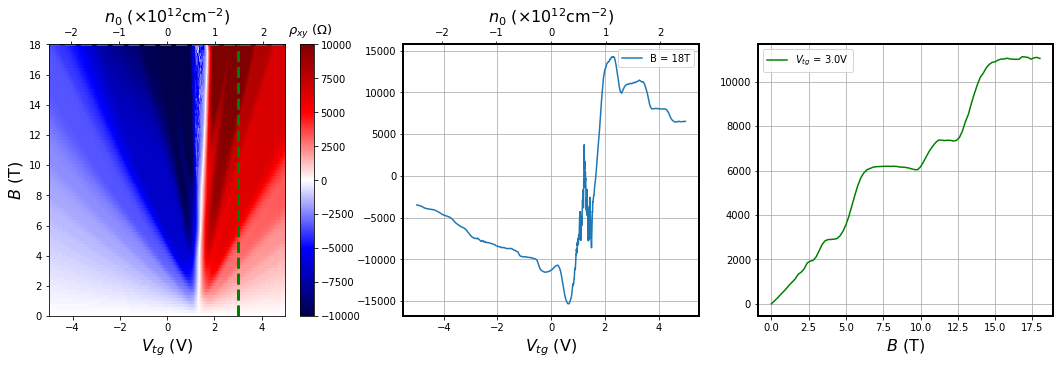

In [31]:
z = (data['X'+sample_to_KH[3]]-data['X'+sample_to_KH[12]])/data['X'+sample_to_KH[9]]
z_s = []
for i in range(len(z)//2+1):
    z_s.append((-z[i]+z[-i-1])/2)
z = np.array(z_s[::-1])

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(18, 5)

# ii = 7280 # 2.0V
ii = 8320 # 3.0V
Vt0 = round(data['AO9'][0][ii], 2)

im = ax1.imshow(z, extent = (-5, 5, 0, 18), origin='lower', cmap='seismic', **improps, vmin=-10e3, vmax=10e3)
ax1.plot(data['AO9'][0], [18]*len(data['AO9'][0]), linestyle='--', linewidth=3)
ax1.plot([Vt0]*96, np.linspace(0, 18, 96), linestyle='--', linewidth=3, color='g')
cbar = plt.colorbar(im, ax=ax1)
cbar.set_label('$\\rho_{xy}$ ($\Omega$)', labelpad=-50, y=1.08, rotation=0, size=13)
ax1.set_xlabel('$V_{tg}$ (V)', size=16)
ax1.set_ylabel('$B$ (T)', size=16)
ax1.set_xlim(-5, 5)
ax1.set_ylim(0, 18)
secax = ax1.secondary_xaxis('top', functions=(Vt_to_n, n_to_Vt))
secax.set_xlabel('$n_0$ ($\\times \\mathrm{10^{12} cm^{-2}}$)', size=16)

ax2.plot(data['AO9'][0], z[-1], label='B = 18T')
ax2.set_xlabel('$V_{tg}$ (V)', size=16)
secax = ax2.secondary_xaxis('top', functions=(Vt_to_n, n_to_Vt))
secax.set_xlabel('$n_0$ ($\\times \\mathrm{10^{12} cm^{-2}}$)', size=16)
ax2.legend()
ax2.grid('on')
for axis in ['top','bottom','left','right']:
    ax2.spines[axis].set_linewidth(2)

ax3.plot(np.linspace(0, 18, 91), z[:,ii], label='$V_{tg}$ = '+str(Vt0)+'V', color='g')
ax3.set_xlabel('$B$ (T)', size=16)
ax3.legend()
ax3.grid('on')
for axis in ['top','bottom','left','right']:
    ax3.spines[axis].set_linewidth(2)

plt.show()

<font size="4"><font color='red'>$\mathbf{Fig. 6j}$</font> post-symmetrization: plot linecuts of $\rho_{xx}$ (14-12) and $\rho_{xy}$ (3-12) at fixed $V_{tg}$ together

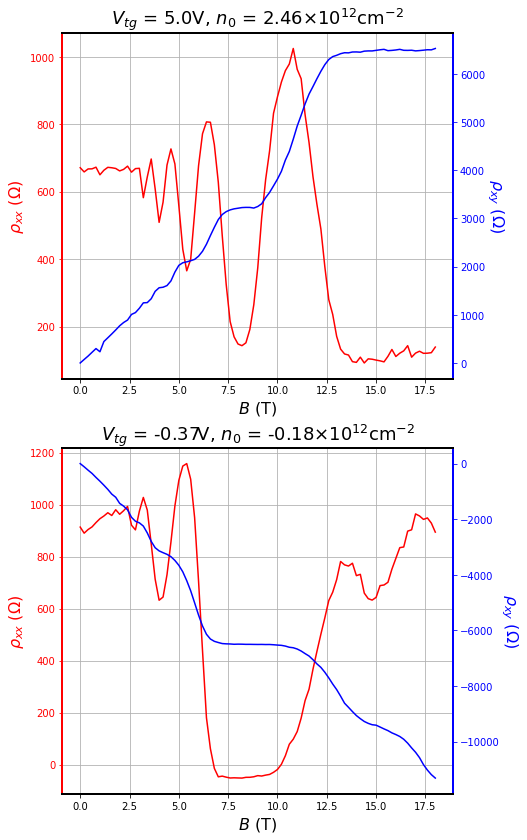

In [32]:
z_xx = (data['X'+sample_to_KH[14]]-data['X'+sample_to_KH[12]])/data['X'+sample_to_KH[9]]
z_s = []
for i in range(len(z_xx)//2+1):
    z_s.append((z_xx[i]+z_xx[-i-1])/2)
z_xx = np.array(z_s[::-1])

z_xy = (data['X'+sample_to_KH[3]]-data['X'+sample_to_KH[12]])/data['X'+sample_to_KH[9]]
z_s = []
for i in range(len(z_xy)//2+1):
    z_s.append((-z_xy[i]+z_xy[-i-1])/2)
z_xy = np.array(z_s[::-1])

fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_size_inches(7, 14)

col = -1
n = round(compute_n(Vt=data['AO9'][0][col]), 2)
ax1.plot(np.linspace(0, 18, 91), z_xx[:,col], label='$V_{tg}$ = '+str(data['AO9'][0][col])+'V', color='r')
ax1.set_xlabel('$B$ (T)', size=16)
ax1.set_ylabel('$\\rho_{xx}$ ($\Omega$)', size=16, color='r')
ax11 = ax1.twinx()
ax11.plot(np.linspace(-0, 18, 91), z_xy[:,col], label='$V_{tg}$ = '+str(data['AO9'][0][col])+'V', color='b')
ax11.set_ylabel('$\\rho_{xy}$ ($\Omega$)', size=16, color='b', rotation=-90, labelpad=20)
ax1.grid('on')
ax1.set_title('$V_{tg}$ = '+str(data['AO9'][0][col])+'V, $n_0$ = '+str(n)+'$\\times \\mathrm{10^{12} cm^{-2}}$', size=18)
ax1.tick_params(axis='y', colors='r')
ax11.tick_params(axis='y', colors='b')
ax11.spines['left'].set_color('r')
ax11.spines['right'].set_color('b')
for axis in ['top','bottom','left','right']:
    ax11.spines[axis].set_linewidth(2)

col = 4820
n = round(compute_n(Vt=data['AO9'][0][col]), 2)
ax2.plot(np.linspace(0, 18, 91), z_xx[:,col], label='$V_{tg}$ = '+str(data['AO9'][0][col])+'V', color='r')
ax2.set_xlabel('$B$ (T)', size=16)
ax2.set_ylabel('$\\rho_{xx}$ ($\Omega$)', size=16, color='r')
ax22 = ax2.twinx()
ax22.plot(np.linspace(0, 18, 91), z_xy[:,col], label='$V_{tg}$ = '+str(data['AO9'][0][col])+'V', color='b')
ax22.set_ylabel('$\\rho_{xy}$ ($\Omega$)', size=16, color='b', rotation=-90, labelpad=20)
ax2.grid('on')
ax2.set_title('$V_{tg}$ = '+str(round(data['AO9'][0][col],2))+'V, $n_0$ = '+str(n)+'$\\times \\mathrm{10^{12} cm^{-2}}$', size=18)
ax2.tick_params(axis='y', colors='r')
ax22.tick_params(axis='y', colors='b')
ax22.spines['left'].set_color('r')
ax22.spines['right'].set_color('b')
for axis in ['top','bottom','left','right']:
    ax22.spines[axis].set_linewidth(2)

plt.show()

In [33]:
# Save as PDF without codes

!jupyter nbconvert analysis.ipynb --to=webpdf --TemplateExporter.exclude_input=True

[NbConvertApp] Converting notebook analysis.ipynb to webpdf
[NbConvertApp] Building PDF
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 9852656 bytes to analysis.pdf
